# Analyzing Top Largest Companies in the United States by Revenue

In [1]:

from bs4 import BeautifulSoup 
from selenium import webdriver
import requests 
import pandas as pd 
import matplotlib.pyplot as plt
import time


### Collecting Data Using BeautifulSoup

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue"
page = requests.get(url)
soup = BeautifulSoup(page.text,'html')

In [3]:
soup.find('table',class_ = 'wikitable sortable')

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [4]:
table = soup.find_all('table')[1]

In [5]:
world_titles=table.find_all('th')

In [6]:
world_table_titles = [title.text.strip() for title in world_titles]

In [7]:
d = pd.DataFrame(columns = world_table_titles)
d

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [8]:
columndata=table.find_all('tr')

In [9]:
for row in columndata[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    print(individual_row_data)
    
    length = len(d)
    d.loc[length]= individual_row_data

['1', 'Walmart', 'Retail', '611,289', '6.7%', '2,100,000', 'Bentonville, Arkansas']
['2', 'Amazon', 'Retail and cloud computing', '513,983', '9.4%', '1,540,000', 'Seattle, Washington']
['3', 'ExxonMobil', 'Petroleum industry', '413,680', '44.8%', '62,000', 'Spring, Texas']
['4', 'Apple', 'Electronics industry', '394,328', '7.8%', '164,000', 'Cupertino, California']
['5', 'UnitedHealth Group', 'Healthcare', '324,162', '12.7%', '400,000', 'Minnetonka, Minnesota']
['6', 'CVS Health', 'Healthcare', '322,467', '10.4%', '259,500', 'Woonsocket, Rhode Island']
['7', 'Berkshire Hathaway', 'Conglomerate', '302,089', '9.4%', '383,000', 'Omaha, Nebraska']
['8', 'Alphabet', 'Technology and cloud computing', '282,836', '9.8%', '156,000', 'Mountain View, California']
['9', 'McKesson Corporation', 'Health', '276,711', '4.8%', '48,500', 'Irving, Texas']
['10', 'Chevron Corporation', 'Petroleum industry', '246,252', '51.6%', '43,846', 'San Ramon, California']
['11', 'Cencora', 'Pharmacy wholesale', '238

['96', 'Best Buy', 'Retail', '46,298', '10.6%', '71,100', 'Richfield, Minnesota']
['97', 'Bristol-Myers Squibb', 'Pharmaceutical industry', '46,159', '0.5%', '34,300', 'New York City, New York']
['98', 'United Airlines', 'Airline', '44,955', '82.5%', '92,795', 'Chicago, Illinois']
['99', 'Thermo Fisher Scientific', 'Laboratory instruments', '44,915', '14.5%', '130,000', 'Waltham, Massachusetts']
['100', 'Qualcomm', 'Technology', '44,200', '31.7%', '51,000', 'San Diego, California']


#### Collected Data in DataFrame

In [10]:
d

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
97,98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5%,"130,000","Waltham, Massachusetts"


### Data Transformation

In [11]:
# Convert the values in the 'Revenue (USD millions)' column to string first
d['Revenue (USD millions)'] = d['Revenue (USD millions)'].astype(str)
# Remove commas from the strings and convert to float
d['Revenue (USD millions)'] = d['Revenue (USD millions)'].str.replace(',', '').astype(float)


In [12]:
# Convert the values in the 'Revenue growth' column to string first
d['Revenue growth'] = d['Revenue growth'].astype(str)
# Remove percentage sign from the strings and convert to float
d['Revenue growth'] = d['Revenue growth'].str.rstrip('%').astype(float)


In [13]:
# Convert the values in the 'Employees' column to string first
d['Employees'] = d['Employees'].astype(str)
# Remove non-numeric characters, such as brackets, and commas from the strings
d['Employees'] = d['Employees'].str.replace(r'\D', '', regex=True)
# Convert to float
d['Employees'] = d['Employees'].astype(float)


In [14]:
# Create empty columns for City and State
d['City'] = ''
d['State'] = ''

# Split the 'Headquarters' column into separate columns for city and state
headquarters_split = d['Headquarters'].str.split(', ', n=1, expand=True)

# Assign values to City and State columns based on split results
d['City'] = headquarters_split[0]
d['State'] = headquarters_split[1].fillna('')  # Fill NaN values with empty string if state is missing


In [15]:
d

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,City,State
0,1,Walmart,Retail,611289.0,6.7,2100000.0,"Bentonville, Arkansas",Bentonville,Arkansas
1,2,Amazon,Retail and cloud computing,513983.0,9.4,1540000.0,"Seattle, Washington",Seattle,Washington
2,3,ExxonMobil,Petroleum industry,413680.0,44.8,62000.0,"Spring, Texas",Spring,Texas
3,4,Apple,Electronics industry,394328.0,7.8,164000.0,"Cupertino, California",Cupertino,California
4,5,UnitedHealth Group,Healthcare,324162.0,12.7,400000.0,"Minnetonka, Minnesota",Minnetonka,Minnesota
...,...,...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,46298.0,10.6,71100.0,"Richfield, Minnesota",Richfield,Minnesota
96,97,Bristol-Myers Squibb,Pharmaceutical industry,46159.0,0.5,34300.0,"New York City, New York",New York City,New York
97,98,United Airlines,Airline,44955.0,82.5,92795.0,"Chicago, Illinois",Chicago,Illinois
98,99,Thermo Fisher Scientific,Laboratory instruments,44915.0,14.5,130000.0,"Waltham, Massachusetts",Waltham,Massachusetts


In [16]:
d['City'].isnull().value_counts()

False    100
Name: City, dtype: int64

In [17]:
# Get unique values from the 'Industry' column
unique_categories = d['Industry'].unique()

# Split combined categories if necessary
categories = set()  # Using a set to ensure uniqueness
for category in unique_categories:
    if ' and ' in category:
        # Split combined categories
        split_categories = category.split(' and ')
        categories.update(split_categories)
    else:
        categories.add(category)

# Convert set to list for easier handling
categories_list = list(categories)
print(categories_list)


['Transportation', 'Laboratory instruments', 'Financials', 'Telecom hardware manufacturing', 'telecomunications', 'defense', 'Media', 'logistics', 'Food processing', 'Apparel', 'Financial', 'Telecommunications', 'Machinery', 'Agriculture cooperative', 'Automotive industry', 'Electronics industry', 'Conglomerate', 'Healthcare', 'Automotive', 'Agriculture manufacturing', 'Insurance', 'Logistics', 'cloud computing', 'Pharmacy wholesale', 'Infotech', 'Food service', 'Petroleum industry', 'Health', 'Aerospace', 'Financial services', 'Beverage', 'Retail', 'Consumer products manufacturing', 'Health insurance', 'Chemical industry', 'energy', 'Food industry', 'Airline', 'Pharmaceutical industry', 'Technology']


In [18]:
split_categories

['Petroleum industry', 'logistics']

In [19]:
d

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,City,State
0,1,Walmart,Retail,611289.0,6.7,2100000.0,"Bentonville, Arkansas",Bentonville,Arkansas
1,2,Amazon,Retail and cloud computing,513983.0,9.4,1540000.0,"Seattle, Washington",Seattle,Washington
2,3,ExxonMobil,Petroleum industry,413680.0,44.8,62000.0,"Spring, Texas",Spring,Texas
3,4,Apple,Electronics industry,394328.0,7.8,164000.0,"Cupertino, California",Cupertino,California
4,5,UnitedHealth Group,Healthcare,324162.0,12.7,400000.0,"Minnetonka, Minnesota",Minnetonka,Minnesota
...,...,...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,46298.0,10.6,71100.0,"Richfield, Minnesota",Richfield,Minnesota
96,97,Bristol-Myers Squibb,Pharmaceutical industry,46159.0,0.5,34300.0,"New York City, New York",New York City,New York
97,98,United Airlines,Airline,44955.0,82.5,92795.0,"Chicago, Illinois",Chicago,Illinois
98,99,Thermo Fisher Scientific,Laboratory instruments,44915.0,14.5,130000.0,"Waltham, Massachusetts",Waltham,Massachusetts


In [20]:
split_categories = d['Industry'].str.split(' and ', expand=True)

In [21]:
split_categories 

,0,1
0,Retail,None
1,Retail,cloud computing
2,Petroleum industry,None
3,Electronics industry,None
4,Healthcare,None
...,...,...
95,Retail,None
96,Pharmaceutical industry,None
97,Airline,None
98,Laboratory instruments,None


In [22]:
split_categories[0].value_counts()


Retail                             11
Petroleum industry                 11
Financials                         11
Technology                          8
Pharmaceutical industry             6
Healthcare                          6
Insurance                           5
Conglomerate                        4
Telecommunications                  3
Airline                             3
Automotive industry                 2
Health insurance                    2
Food industry                       2
Transportation                      2
Food processing                     2
Financial                           2
Aerospace                           2
Telecom hardware manufacturing      1
Machinery                           1
Agriculture manufacturing           1
Agriculture cooperative             1
Chemical industry                   1
Apparel                             1
Media                               1
Infotech                            1
Food service                        1
Logistics   

In [23]:
split_categories[1].value_counts()

cloud computing      4
defense              2
telecomunications    1
energy               1
logistics            1
Name: 1, dtype: int64

In [24]:
# Concatenate the split categories with the original DataFrame
d = pd.concat([d, split_categories], axis=1)

In [25]:
d

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,City,State,0,1
0,1,Walmart,Retail,611289.0,6.7,2100000.0,"Bentonville, Arkansas",Bentonville,Arkansas,Retail,None
1,2,Amazon,Retail and cloud computing,513983.0,9.4,1540000.0,"Seattle, Washington",Seattle,Washington,Retail,cloud computing
2,3,ExxonMobil,Petroleum industry,413680.0,44.8,62000.0,"Spring, Texas",Spring,Texas,Petroleum industry,None
3,4,Apple,Electronics industry,394328.0,7.8,164000.0,"Cupertino, California",Cupertino,California,Electronics industry,None
4,5,UnitedHealth Group,Healthcare,324162.0,12.7,400000.0,"Minnetonka, Minnesota",Minnetonka,Minnesota,Healthcare,None
...,...,...,...,...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,46298.0,10.6,71100.0,"Richfield, Minnesota",Richfield,Minnesota,Retail,None
96,97,Bristol-Myers Squibb,Pharmaceutical industry,46159.0,0.5,34300.0,"New York City, New York",New York City,New York,Pharmaceutical industry,None
97,98,United Airlines,Airline,44955.0,82.5,92795.0,"Chicago, Illinois",Chicago,Illinois,Airline,None
98,99,Thermo Fisher Scientific,Laboratory instruments,44915.0,14.5,130000.0,"Waltham, Massachusetts",Waltham,Massachusetts,Laboratory instruments,None


In [26]:
# Get dummies for each split category
dummies = pd.get_dummies(d[[0, 1]], prefix='', prefix_sep='')


In [27]:
# Concatenate the dummies with the original DataFrame
d = pd.concat([d, dummies], axis=1)

In [28]:
d

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,City,State,0,...,Retail,Technology,Telecom hardware manufacturing,Telecommunications,Transportation,cloud computing,defense,energy,logistics,telecomunications
0,1,Walmart,Retail,611289.0,6.7,2100000.0,"Bentonville, Arkansas",Bentonville,Arkansas,Retail,...,1,0,0,0,0,0,0,0,0,0
1,2,Amazon,Retail and cloud computing,513983.0,9.4,1540000.0,"Seattle, Washington",Seattle,Washington,Retail,...,1,0,0,0,0,1,0,0,0,0
2,3,ExxonMobil,Petroleum industry,413680.0,44.8,62000.0,"Spring, Texas",Spring,Texas,Petroleum industry,...,0,0,0,0,0,0,0,0,0,0
3,4,Apple,Electronics industry,394328.0,7.8,164000.0,"Cupertino, California",Cupertino,California,Electronics industry,...,0,0,0,0,0,0,0,0,0,0
4,5,UnitedHealth Group,Healthcare,324162.0,12.7,400000.0,"Minnetonka, Minnesota",Minnetonka,Minnesota,Healthcare,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,46298.0,10.6,71100.0,"Richfield, Minnesota",Richfield,Minnesota,Retail,...,1,0,0,0,0,0,0,0,0,0
96,97,Bristol-Myers Squibb,Pharmaceutical industry,46159.0,0.5,34300.0,"New York City, New York",New York City,New York,Pharmaceutical industry,...,0,0,0,0,0,0,0,0,0,0
97,98,United Airlines,Airline,44955.0,82.5,92795.0,"Chicago, Illinois",Chicago,Illinois,Airline,...,0,0,0,0,0,0,0,0,0,0
98,99,Thermo Fisher Scientific,Laboratory instruments,44915.0,14.5,130000.0,"Waltham, Massachusetts",Waltham,Massachusetts,Laboratory instruments,...,0,0,0,0,0,0,0,0,0,0


In [29]:
d1 = d.drop(['Industry', 0, 1,'Headquarters'], axis=1)

#### Transfromed Data

In [30]:
d1

,Rank,Name,Revenue (USD millions),Revenue growth,Employees,City,State,Aerospace,Agriculture cooperative,Agriculture manufacturing,...,Retail,Technology,Telecom hardware manufacturing,Telecommunications,Transportation,cloud computing,defense,energy,logistics,telecomunications
0,1,Walmart,611289.0,6.7,2100000.0,Bentonville,Arkansas,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,Amazon,513983.0,9.4,1540000.0,Seattle,Washington,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,3,ExxonMobil,413680.0,44.8,62000.0,Spring,Texas,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Apple,394328.0,7.8,164000.0,Cupertino,California,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,UnitedHealth Group,324162.0,12.7,400000.0,Minnetonka,Minnesota,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Best Buy,46298.0,10.6,71100.0,Richfield,Minnesota,0,0,0,...,1,0,0,0,0,0,0,0,0,0
96,97,Bristol-Myers Squibb,46159.0,0.5,34300.0,New York City,New York,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,98,United Airlines,44955.0,82.5,92795.0,Chicago,Illinois,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,99,Thermo Fisher Scientific,44915.0,14.5,130000.0,Waltham,Massachusetts,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Analyzing Data

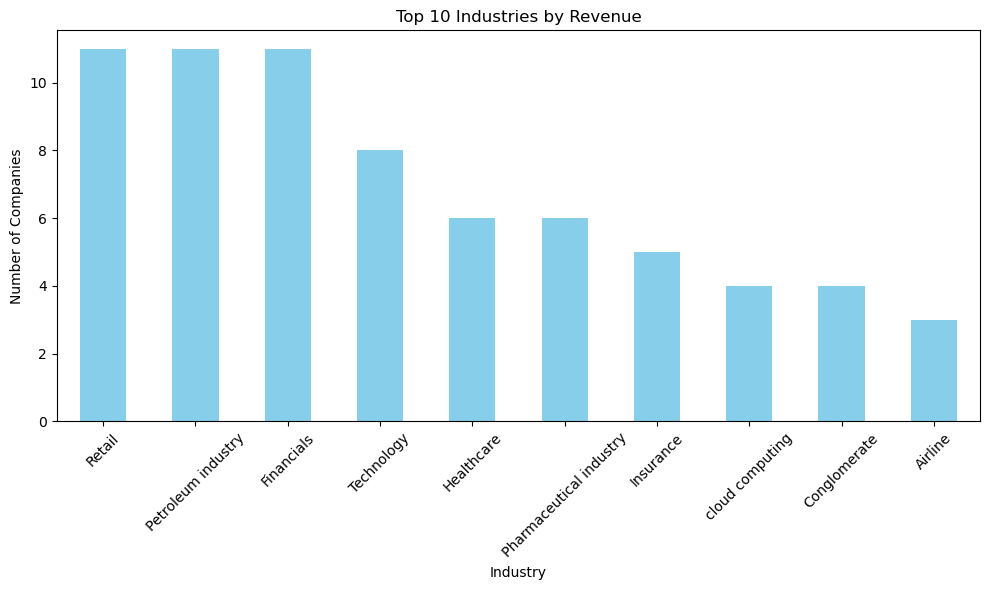

In [31]:
# Plotting revenue for top 10 industries
top_industries = d1.iloc[:, 7:].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_industries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Industries by Revenue')
plt.xlabel('Industry')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

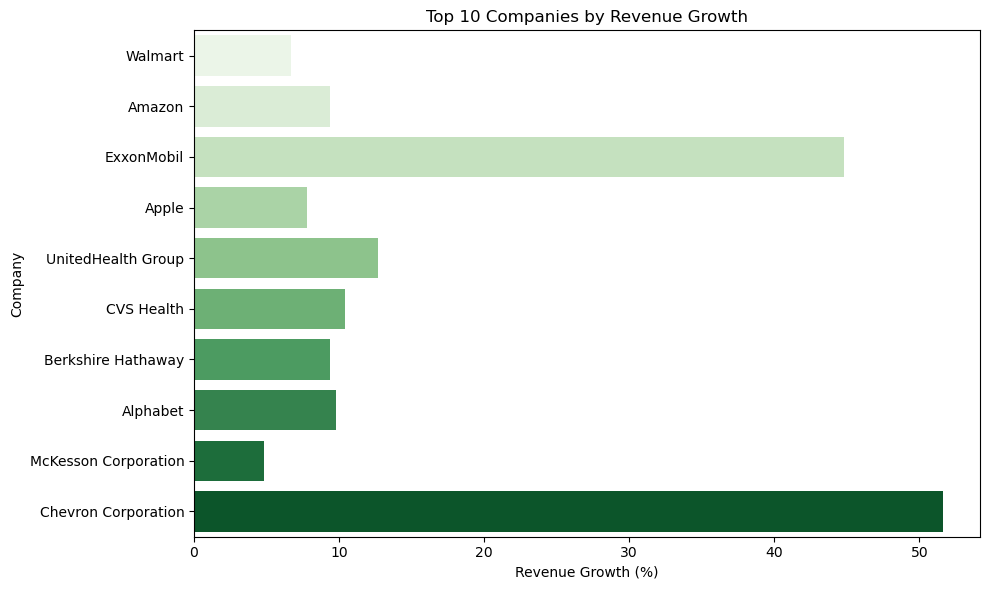

In [32]:
import seaborn as sns
# Plotting revenue growth for top 10 companies
top_companies_growth = d1[['Name', 'Revenue growth']].head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Revenue growth', y='Name', data=top_companies_growth, palette='Greens')
plt.title('Top 10 Companies by Revenue Growth')
plt.xlabel('Revenue Growth (%)')
plt.ylabel('Company')
plt.tight_layout()
plt.show()

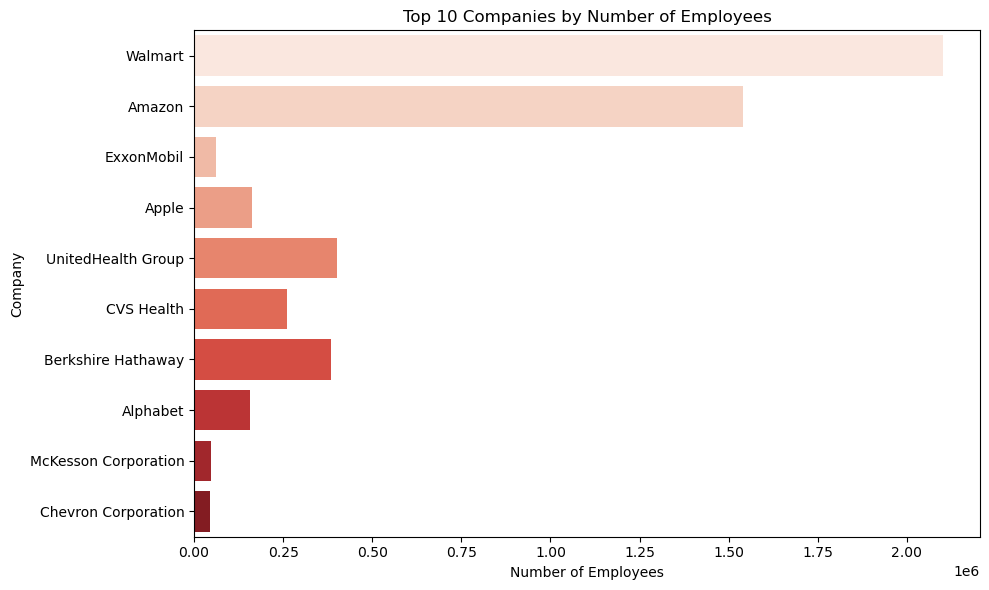

In [33]:
# Plotting number of employees for top 10 companies
top_companies_employees = d1[['Name', 'Employees']].head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Employees', y='Name', data=top_companies_employees, palette='Reds')
plt.title('Top 10 Companies by Number of Employees')
plt.xlabel('Number of Employees')
plt.ylabel('Company')
plt.tight_layout()
plt.show()

### Perfroming Clustering Algorithms

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Selecting features for clustering
features = d1[['Revenue (USD millions)', 'Revenue growth', 'Employees']]
scaler = StandardScaler()

# Normalizing the features
features_scaled = scaler.fit_transform(features)


In [35]:
# Applying K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
d1['Cluster'] = kmeans.fit_predict(features_scaled)


C:\Users\amrap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\amrap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


   Revenue (USD millions)  Revenue growth     Employees
0           106995.250000       62.343750  4.418725e+04
1           108773.780488       11.512195  1.523867e+05
2           562636.000000        8.050000  1.820000e+06
1    82
0    16
2     2
Name: Cluster, dtype: int64


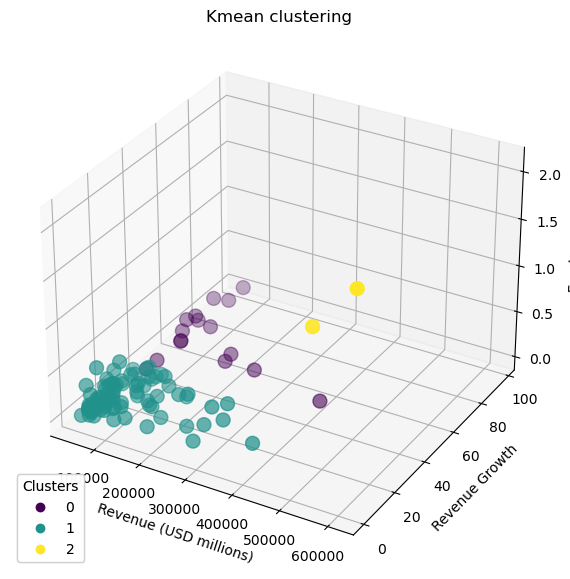

In [36]:
# Check the centroids of the clusters
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print(pd.DataFrame(centroids, columns=['Revenue (USD millions)', 'Revenue growth', 'Employees']))

# Count number of companies in each cluster
print(d1['Cluster'].value_counts())

# Plotting clusters

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Creating a 3D plot
fig = plt.figure(figsize=(20, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of your data
scatter = ax.scatter(d1['Revenue (USD millions)'],
                     d1['Revenue growth'],
                     d1['Employees'],
                     c=d1['Cluster'], cmap='viridis', s=100)

# Labels and title
ax.set_xlabel('Revenue (USD millions)')
ax.set_ylabel('Revenue Growth')
ax.set_zlabel('Employees')
plt.title('Kmean clustering')

# Legend with cluster labels
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Clusters")
ax.add_artist(legend1)

# Show the plot
plt.show()

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming 'd1' is your DataFrame from previous steps
features = d1[['Revenue (USD millions)', 'Revenue growth', 'Employees']]
scaler = StandardScaler()

# Normalize the features
features_scaled = scaler.fit_transform(features)

# Using Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
d1['Cluster'] = agg_clust.fit_predict(features_scaled)


C:\Users\amrap\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


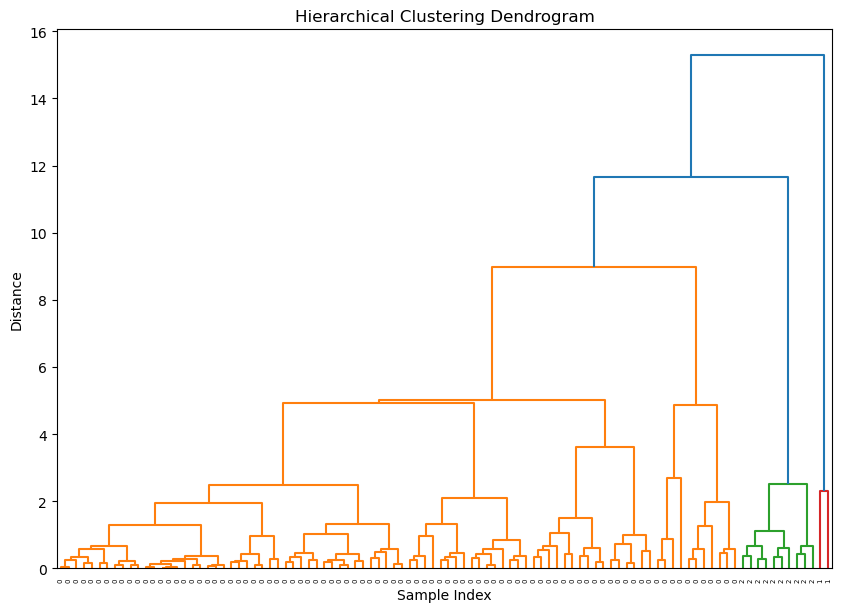

In [38]:
# Create the linkage matrix
linked = linkage(features_scaled, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=d1['Cluster'].values, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


0    88
2    10
1     2
Name: Cluster, dtype: int64


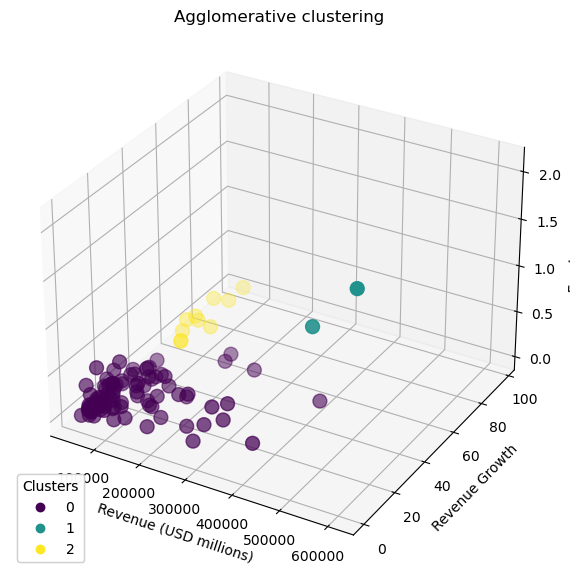

In [39]:
# Check how many companies fall into each cluster
print(d1['Cluster'].value_counts())

# Plotting clusters
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Creating a 3D plot
fig = plt.figure(figsize=(20, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of your data
scatter = ax.scatter(d1['Revenue (USD millions)'],
                     d1['Revenue growth'],
                     d1['Employees'],
                     c=d1['Cluster'], cmap='viridis', s=100)

# Labels and title
ax.set_xlabel('Revenue (USD millions)')
ax.set_ylabel('Revenue Growth')
ax.set_zlabel('Employees')
plt.title('Agglomerative clustering')

# Legend with cluster labels
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Clusters")
ax.add_artist(legend1)

# Show the plot
plt.show()

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'd1' is your DataFrame and we're considering the following features
features = d1[['Revenue (USD millions)', 'Revenue growth', 'Employees']]
scaler = StandardScaler()

# Normalize the features
features_scaled = scaler.fit_transform(features)


In [41]:
# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
d1['Cluster'] = dbscan.fit_predict(features_scaled)


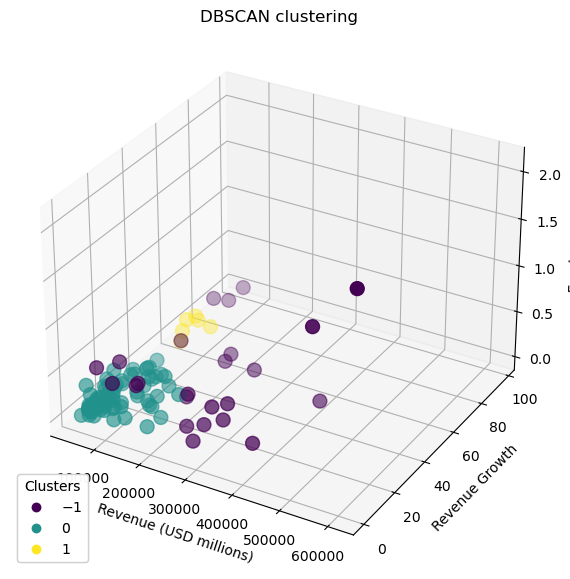

In [42]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Creating a 3D plot
fig = plt.figure(figsize=(20, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of your data
scatter = ax.scatter(d1['Revenue (USD millions)'],
                     d1['Revenue growth'],
                     d1['Employees'],
                     c=d1['Cluster'], cmap='viridis', s=100)

# Labels and title
ax.set_xlabel('Revenue (USD millions)')
ax.set_ylabel('Revenue Growth')
ax.set_zlabel('Employees')
plt.title('DBSCAN clustering')

# Legend with cluster labels
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Clusters")
ax.add_artist(legend1)

# Show the plot
plt.show()


### DBSCAN Clustering Algorithm on Different features

In [43]:
#CLUSTERING ON INDUSTRIES AND REVNEUES
# Get the names of these top industries
top_industry_names = top_industries.index.tolist()

In [44]:
top_industries_df = d1[top_industry_names]

In [45]:
top_industries_df

,Retail,Petroleum industry,Financials,Technology,Healthcare,Pharmaceutical industry,Insurance,cloud computing,Conglomerate,Airline
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
95,1,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,1,0,0,0,0
97,0,0,0,0,0,0,0,0,0,1
98,0,0,0,0,0,0,0,0,0,0


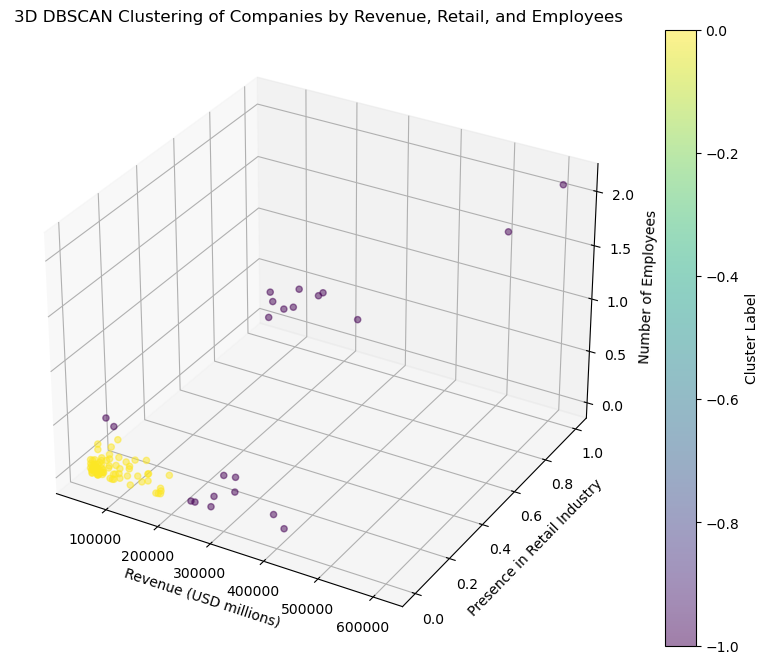

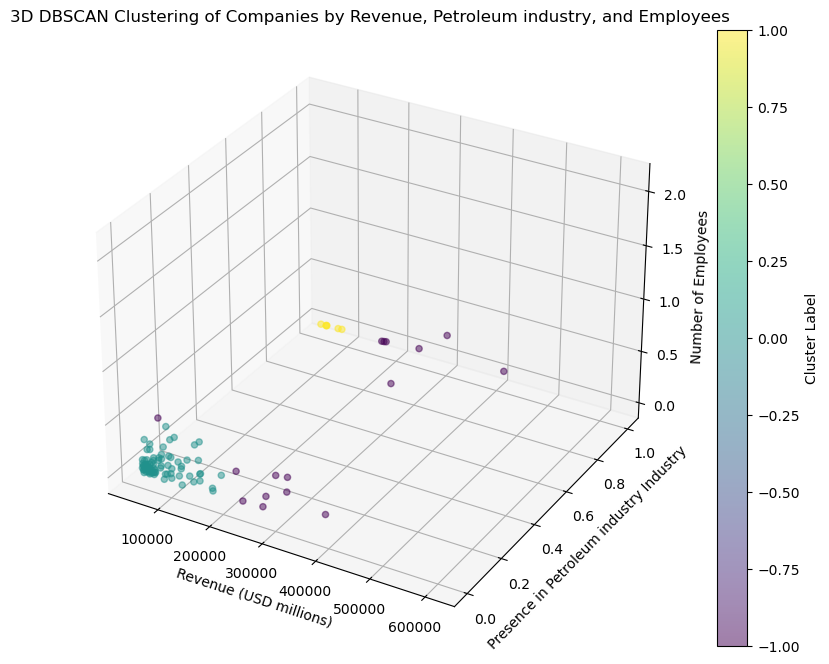

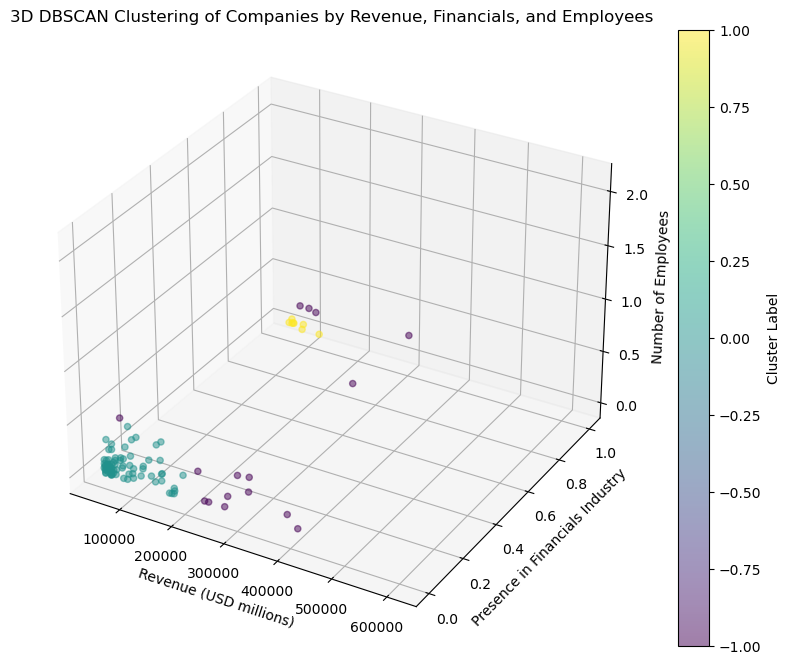

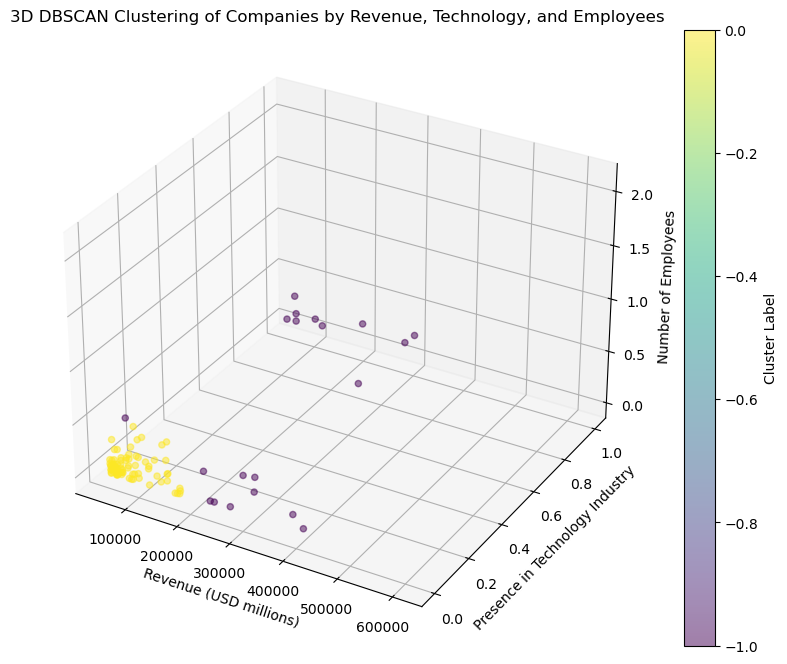

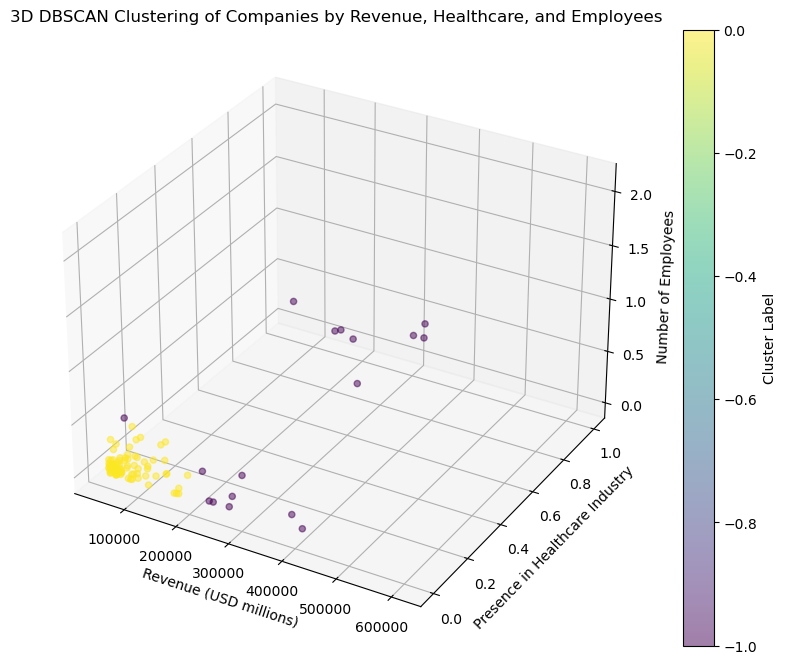

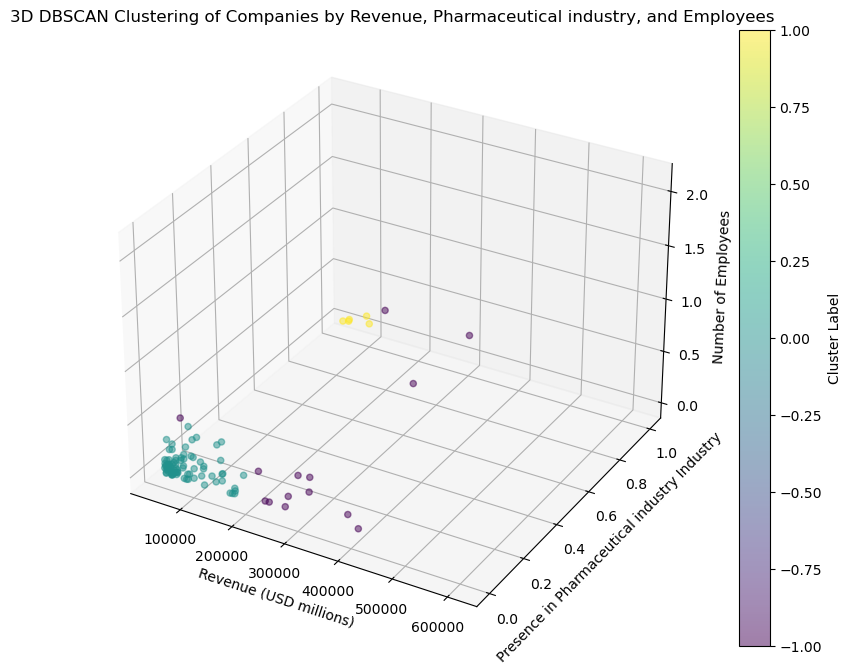

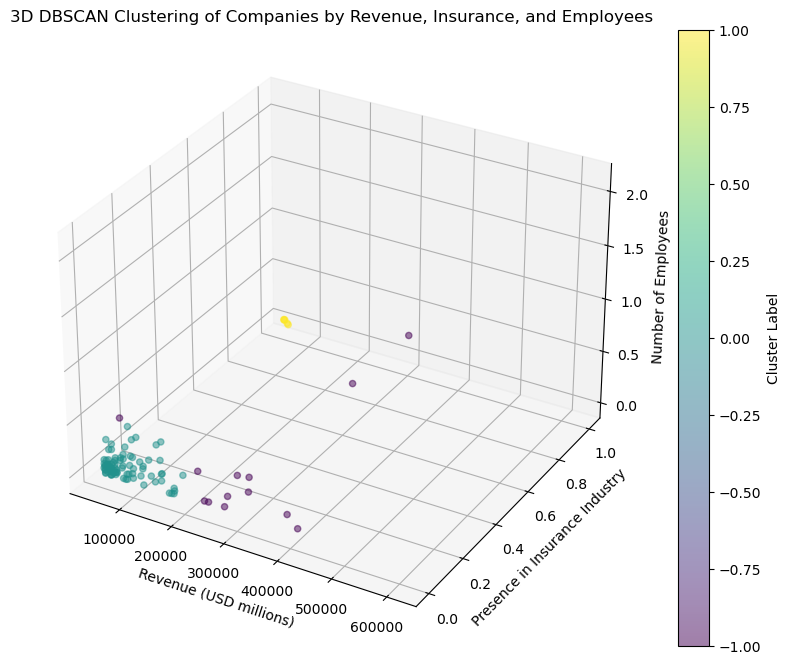

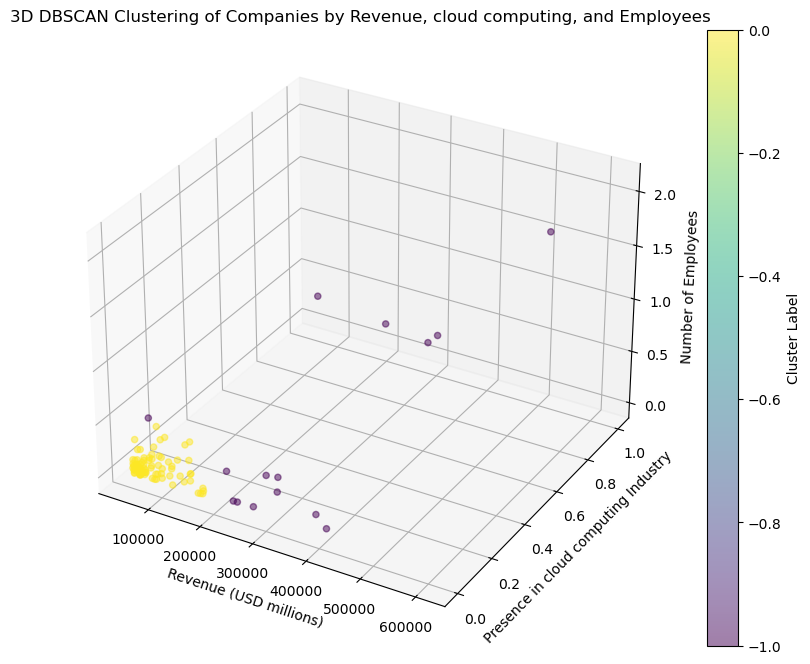

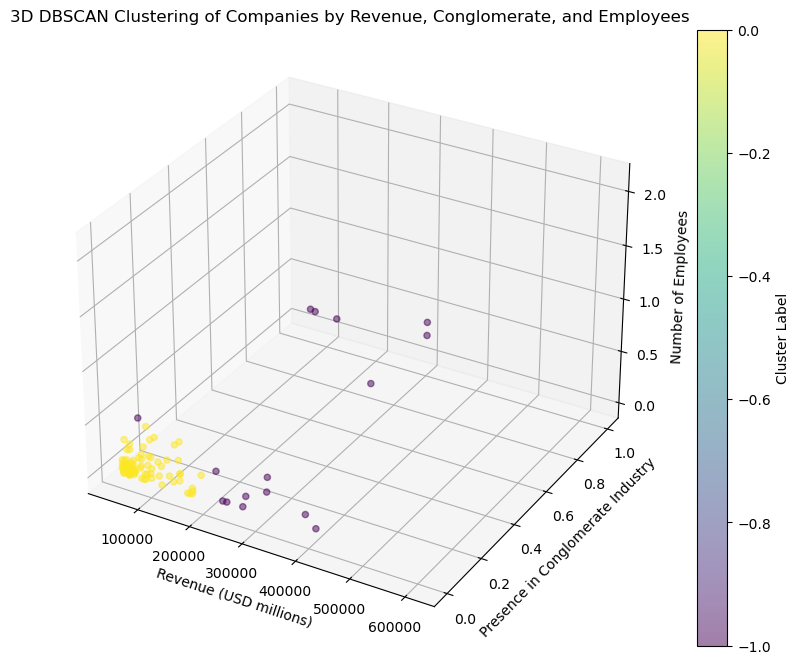

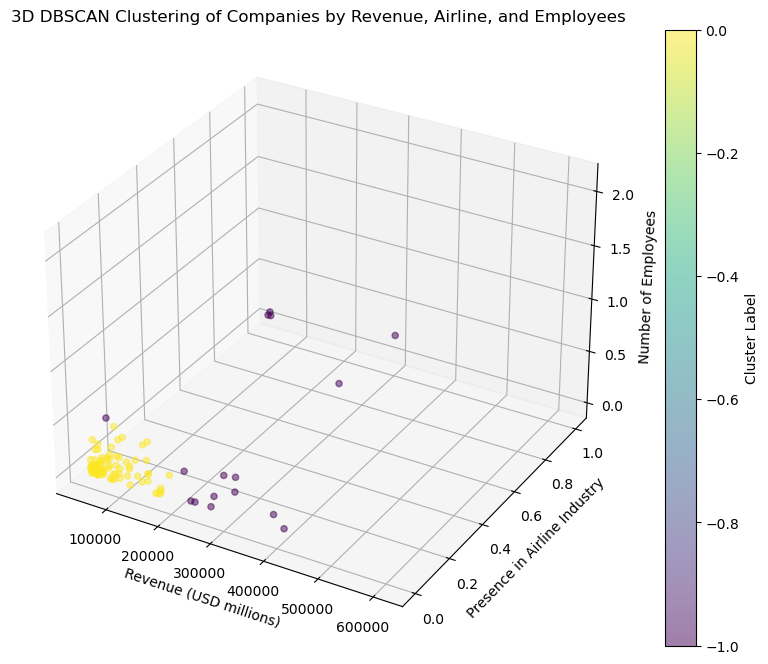

In [46]:
#CLUSTERING ON INDUSTRIES AND REVNEUES
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

# Scaling the features
scaler = StandardScaler()

# Loop over each industry column in top_industries_df
for industry_name in top_industries_df.columns:
    # Prepare the feature matrix for clustering
    X = pd.concat([d1[['Revenue (USD millions)', 'Employees']], top_industries_df[[industry_name]]], axis=1)
    X_scaled = scaler.fit_transform(X) 
    
    # Apply DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=5)  
    clusters = dbscan.fit_predict(X_scaled)
    
    # Setup for 3D plotting
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Creating the scatter plot
    scatter = ax.scatter(X['Revenue (USD millions)'], X[industry_name], X['Employees'], c=clusters, cmap='viridis', alpha=0.5)
    
    # Labelling axes
    ax.set_xlabel('Revenue (USD millions)')
    ax.set_ylabel(f'Presence in {industry_name} Industry')
    ax.set_zlabel('Number of Employees')
    
    # Adding a title
    ax.set_title(f'3D DBSCAN Clustering of Companies by Revenue, {industry_name}, and Employees')
    
    # Adding a color bar
    color_bar = fig.colorbar(scatter, ax=ax)
    color_bar.set_label('Cluster Label')
    
    # Show plot
    plt.show()


### A Dashboard to display analyzed data 

C:\Users\amrap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\amrap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\amrap\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


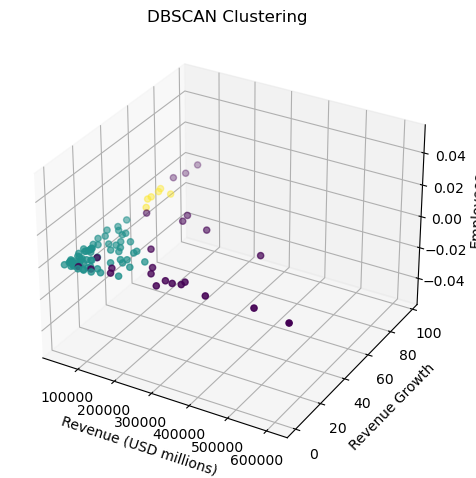

In [57]:
###final
import tkinter as tk
from tkinter import ttk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

class IntegratedDataDashboard(tk.Tk):
    def __init__(self, df):
        super().__init__()
        self.title("Integrated Data Visualization Dashboard")
        self.geometry("1200x800")
        self.data = df
        self.top_industries_df = top_industries_df
       # self.agglo = ['Agglo histo']
    
        # Main title for the dashboard
        self.main_title = tk.Label(self, text="Data Visualization Dashboard", font=("Helvetica", 24, "bold"))
        self.main_title.pack(pady=(10, 5))
        
        # Subtitle for the dashboard
        self.subtitle = tk.Label(self, text="Explore data visualizations and clustering algorithms", font=("Helvetica", 14))
        self.subtitle.pack(pady=(0, 20))

        # Label for the plot dropdown
        self.plot_label = tk.Label(self, text="Select a Visualization or Clustering Method:", font=("Helvetica", 12))
        self.plot_label.pack(pady=(10, 2))
        
        # Dropdown to choose the plot type
        self.plot_options = [
            'Top 10 Industries', 'Top 10 Revenue Growth', 'Top 10 Employees',
            'K-Means Clustering','Agglomerative Clustering', 'DBSCAN Clustering', 'Industry Specific DBSCAN'
        ]
        self.selected_option = tk.StringVar(self)
        self.plot_dropdown = ttk.Combobox(self, textvariable=self.selected_option, values=self.plot_options)
        self.plot_dropdown.pack(pady=20)
        self.plot_dropdown.bind('<<ComboboxSelected>>', self.update_plot)

        # Dropdown for selecting industries if needed
        self.industry_var = tk.StringVar(self)
        self.industry_dropdown = ttk.Combobox(self, textvariable=self.industry_var)
        self.industry_dropdown.pack(pady=20)
        self.industry_dropdown.bind("<<ComboboxSelected>>", self.plot_industry_dbscan)
        
        # Dropdown for agglometric
        #self.agglo_var = tk.StringVar(self)
        #self.agglo_dropdown = ttk.Combobox(self, textvariable=self.agglo_var)
        #self.agglo_dropdown.pack(pady=20)
        #self.agglo_dropdown.bind("<<ComboboxSelected>>", self.agglo_his)

        # Prepare the figure and canvas for plotting
        self.fig, self.ax = plt.subplots()
        self.canvas = FigureCanvasTkAgg(self.fig, self)
        self.canvas_widget = self.canvas.get_tk_widget()
        self.canvas_widget.pack(fill=tk.BOTH, expand=True)
        
      

    def update_plot(self, event=None):
        plot_type = self.selected_option.get()
        self.ax.clear()
        #self.fig.clf()

        if plot_type == 'Industry Specific DBSCAN':
            self.fig.clf()
            self.industry_dropdown['values'] = self.top_industries_df.columns.tolist()  
            self.industry_dropdown.update()
        elif plot_type == 'Top 10 Industries':
            self.plot_top_industries()
        elif plot_type == 'Top 10 Revenue Growth':
            self.plot_revenue_growth()
        elif plot_type == 'Top 10 Employees':
            self.plot_employees()
        elif plot_type == 'K-Means Clustering':
            self.fig.clf()
            self.plot_kmeans()
        elif plot_type == 'Agglomerative Clustering':
            self.fig.clf()
            self.plot_aggcl()
           # if plot_type == 'Agglomerative Clustering':
              #  self.agglo_dropdown['values'] = self.agglo.tolist()  
              #  self.aaglo_dropdown.update()
        elif plot_type == 'DBSCAN Clustering':
            self.fig.clf()
            self.plot_dbscan()
        self.canvas.draw()

    def plot_top_industries(self):
        data = self.data.iloc[:, 7:].sum().sort_values(ascending=False).head(10)
        self.ax.bar(data.index, data.values, color='skyblue')
        self.ax.set_title('Top 10 Industries by Revenue')
        self.ax.set_xlabel('Industry')
        self.ax.set_ylabel('Revenue (USD millions)')

    def plot_revenue_growth(self):
        data = self.data[['Name', 'Revenue growth']].head(10)
        sns.barplot(ax=self.ax, x='Revenue growth', y='Name', data=data, palette='Greens')
        self.ax.set_title('Top 10 Companies by Revenue Growth')

    def plot_employees(self):
        data = self.data[['Name', 'Employees']].head(10)
        sns.barplot(ax=self.ax, x='Employees', y='Name', data=data, palette='Reds')
        self.ax.set_title('Top 10 Companies by Number of Employees')

    def plot_kmeans(self):
        features = self.data[['Revenue (USD millions)', 'Revenue growth', 'Employees']]
        scaler = StandardScaler()
        features_scaled = scaler.fit_transform(features)
        kmeans = KMeans(n_clusters=3, random_state=42)
        clusters = kmeans.fit_predict(features_scaled)
        self.ax.clear()
        self.ax = self.fig.add_subplot(111, projection='3d')
        self.ax.scatter(features['Revenue (USD millions)'], features['Revenue growth'], c=clusters)
        self.ax.set_title('K-Means Clustering')
        self.ax.set_xlabel('Revenue (USD millions)')
        self.ax.set_ylabel('Revenue Growth')
        self.ax.set_zlabel('Employees')
        self.canvas.draw()

    def plot_aggcl(self):
        features = self.data[['Revenue (USD millions)', 'Revenue growth', 'Employees']]
        scaler = StandardScaler()
        features_scaled = scaler.fit_transform(features)
        agg_c = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
        clusters = agg_c.fit_predict(features_scaled)
        self.ax.clear()
        self.ax = self.fig.add_subplot(111, projection='3d')
        self.ax.scatter(features['Revenue (USD millions)'], features['Revenue growth'], c=clusters)
        self.ax.set_title('K-Means Clustering')
        self.ax.set_xlabel('Revenue (USD millions)')
        self.ax.set_ylabel('Revenue Growth')
        self.ax.set_zlabel('Employees')
        self.canvas.draw()
        
    def agglo_his(self):
        linked = linkage(features_scaled, 'ward')
        dendrogram(linked, orientation='top', labels=clusters.values, distance_sort='descending', show_leaf_counts=True)
        self.ax.set_title('Hierarchical Clustering Dendrogram')
        self.ax.set_xlabel('Index')
        self.ax.set_xlabel('Distance')
        self.canvas.draw()

        
    def plot_dbscan(self):
        features = self.data[['Revenue (USD millions)', 'Revenue growth', 'Employees']]
        scaler = StandardScaler()
        features_scaled = scaler.fit_transform(features)
        dbscan = DBSCAN(eps=0.5, min_samples=5)
        clusters = dbscan.fit_predict(features_scaled)
        self.ax.clear()
        self.ax = self.fig.add_subplot(111, projection='3d')
        self.ax.scatter(features['Revenue (USD millions)'], features['Revenue growth'], c=clusters)
        self.ax.set_title('DBSCAN Clustering')
        self.ax.set_xlabel('Revenue (USD millions)')
        self.ax.set_ylabel('Revenue Growth')
        self.ax.set_zlabel('Employees')
        self.canvas.draw()


    def plot_industry_dbscan(self, event):
        industry_name = self.industry_var.get()
        X = pd.concat([self.data[['Revenue (USD millions)', 'Employees']], self.data[[industry_name]]], axis=1)
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        dbscan = DBSCAN(eps=1.5, min_samples=2)
        clusters = dbscan.fit_predict(X_scaled)
        self.ax.clear()
        self.ax = self.fig.add_subplot(111, projection='3d')
        self.ax.scatter(X['Revenue (USD millions)'], X['Employees'], X[industry_name], c=clusters, cmap='viridis', depthshade=True)
        self.ax.set_xlabel('Revenue (USD millions)')
        self.ax.set_ylabel('Employees')
        self.ax.set_zlabel(f'Presence in {industry_name}')
        self.ax.set_title(f'3D DBSCAN Clustering in {industry_name}')
        self.canvas.draw()

if __name__ == '__main__':
    df = d1  
    app = IntegratedDataDashboard(df)
    app.mainloop()
